In [84]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed, randint
from math import floor, pow, log, exp

In [122]:
class TuningAIMD:
    def __init__(self, initial_cwnd=None, num_users=2, capacity=10):
        # Create a list of lists to store cwnd values for each flow
        # User may provide a list (with length: num_users) containing initial cwnd values, otherwise random values for initial cwnd are generated
        
        # Assign initial cwnd values provided by the user
        if initial_cwnd and len(initial_cwnd)==num_users:
            self.cwnd = [[initial_cwnd[i]] for i in range(num_users)]
        # Exit if initial cwnd list length does not correspond with the number of users
        elif initial_cwnd and len(initial_cwnd)!=num_users:
            print('Size of initial cwnd list provided does not correspond with number of users!')
            return -1
        # Generate random values for each user's initial cwnd
        else:
            # seed(1)
            self.cwnd = [[randint(1, capacity)] for i in range(num_users)]

        print(f'Initial flow allocations: {[flow[-1] for flow in self.cwnd]}')
        
        self.num_users = num_users
        self.capacity = capacity

    def plot_simulation(self):
        # only when num_users=2, we plot each user's allocation on each axis (x-axis, y-axies)
        if (self.num_users == 2):
            plt.figure(figsize = (8, 8))

            plt.plot(self.cwnd[0], self.cwnd[1], '-o', label='AIMD Iterates')
            plt.xlabel('User 1\'s Allocation, X1')
            plt.ylabel('User 2\'s Allocation, X2')
            plt.title('AIMD Algorithm Simulation')

            plt.plot([0,self.capacity], [0,self.capacity], '--', label='Fairness Line')
            plt.plot([0,self.capacity], [self.capacity,0],'-', label='Efficiency Line')

            plt.grid()
            plt.legend()
            plt.show()
        
        # Plotting of flows' cwnd against RTT
        plt.figure(figsize = (8, 8))        
        for flow in range(self.num_users):
            plt.plot(self.cwnd[flow], '-o', label=f'Flow {flow+1}')
        plt.xlabel('RTT')
        plt.ylabel('cwnd')

        plt.grid()
        plt.legend()
        plt.show()

    # def performance_report():
    #     # Does flows converge?
    #     relative_difference = abs(x1 - x2) / max(x1, x2)
        

    def run_simulation(self, alpha=1, beta=0.5, max_iteration=100, 
                       alpha_setting='constant', alpha_exponent=1/3, alpha_sigmoid_scale=0.05, alpha_sigmoid_shift=5,
                       beta_setting='constant', beta_inv_sigmoid_min=0.1, beta_inv_sigmoid_slope=0.1, beta_inv_sigmoid_midpt=10):
        # Run for max_iterations
        for i in range(max_iteration):
            # Check if user's total allocation is within capacity
            if sum(self.cwnd[flow][-1] for flow in range(self.num_users)) <= self.capacity:
                # Proceed with Additive Increase
                for flow in self.cwnd:
                    new_flow_value = flow[-1] + alpha_value(alpha, i, flow[-1], alpha_setting, alpha_exponent, alpha_sigmoid_scale, alpha_sigmoid_shift)
                    flow.append(new_flow_value)
                print(f'Interation {i}: Additive Increase. New flow allocations: {[flow[-1] for flow in self.cwnd]}')
            
            # Otherwise, if user's total allocations exceeds capacity of the link
            else:
                # Proceed with Multiplicative Decrease
                for flow in self.cwnd:
                    new_flow_value = floor(flow[-1] * beta_value(beta, i, flow[-1], beta_setting, beta_inv_sigmoid_min, beta_inv_sigmoid_slope, beta_inv_sigmoid_midpt))
                    flow.append(new_flow_value)
                print(f'Interation {i}: Multiplicative Decrease. New flow allocations: {[flow[-1] for flow in self.cwnd]}')
        
        # Displaying the final values 
        print('==== Final Values ====')
        for flow in range(len(self.cwnd)):
            print(f'User {flow+1}: {self.cwnd[flow][-1]}')

        # # Performance
        # self.performance_report()    
        
        # Plot
        self.plot_simulation()

def alpha_value(alpha_initial, iteration, prev_cwnd, setting='constant', exponent=1/3, sigmoid_scale=0.05,sigmoid_shift=5):
    
    # ==== Linear increase ====
    # Constant increase (simplest case)
    if setting == 'constant':
        return alpha_initial
    
    # Logarithmic funcion of window size
    if setting == 'log-incr':
        return floor(alpha_initial*log(prev_cwnd + 1))
    
    # Exponential increase
    if setting == 'exponent-incr':
        return floor(alpha_initial*pow(prev_cwnd,exponent))
    
    # ==== Non-Linear increase ====
    # Sigmoidal increase with multiplicative factor
    if setting == 'sigmoid-incr':
        return floor(alpha_initial*(1 + np.exp(-sigmoid_scale * (prev_cwnd - sigmoid_shift))))


def beta_value(beta_initial, iteration, prev_cwnd, setting='constant', inv_sigmoid_min=0.1, inv_sigmoid_slope=0.1, inv_sigmoid_midpt=10):

    # Constant multiplicative decrease(simplest case)
    if setting == 'constant':
        return beta_initial
    
    # Window size dependent decrease
    if setting == 'cwnd-decr':
        return beta_initial/prev_cwnd

    # Inverse Sigmoidal decrease
    if setting == 'inv-sigmoid-decr':
        return (1 - inv_sigmoid_min) / (1 + exp(-inv_sigmoid_slope * (iteration - inv_sigmoid_midpt)))


# Experiments

## When number of TCP Users/ Flows = 2

### Experiment 1: Constant Alpha, Constant Beta

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [3, 7]
Interation 1: Additive Increase. New flow allocations: [4, 8]
Interation 2: Multiplicative Decrease. New flow allocations: [2, 4]
Interation 3: Additive Increase. New flow allocations: [3, 5]
Interation 4: Additive Increase. New flow allocations: [4, 6]
Interation 5: Additive Increase. New flow allocations: [5, 7]
Interation 6: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 7: Additive Increase. New flow allocations: [3, 4]
Interation 8: Additive Increase. New flow allocations: [4, 5]
Interation 9: Additive Increase. New flow allocations: [5, 6]
Interation 10: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 11: Additive Increase. New flow allocations: [3, 4]
Interation 12: Additive Increase. New flow allocations: [4, 5]
Interation 13: Additive Increase. New flow allocations: [5, 6]
Interation 14: Multiplicative Decrease. New flow allocations: [2, 3]
Interati

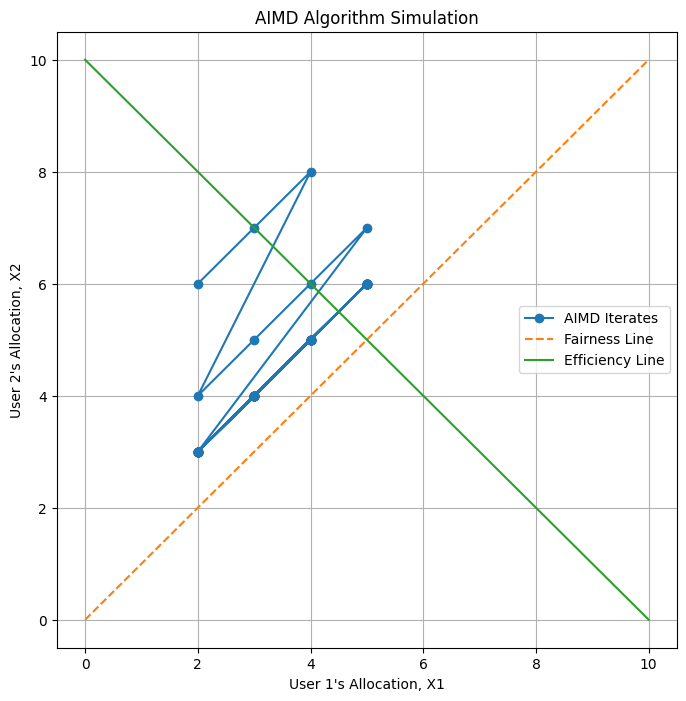

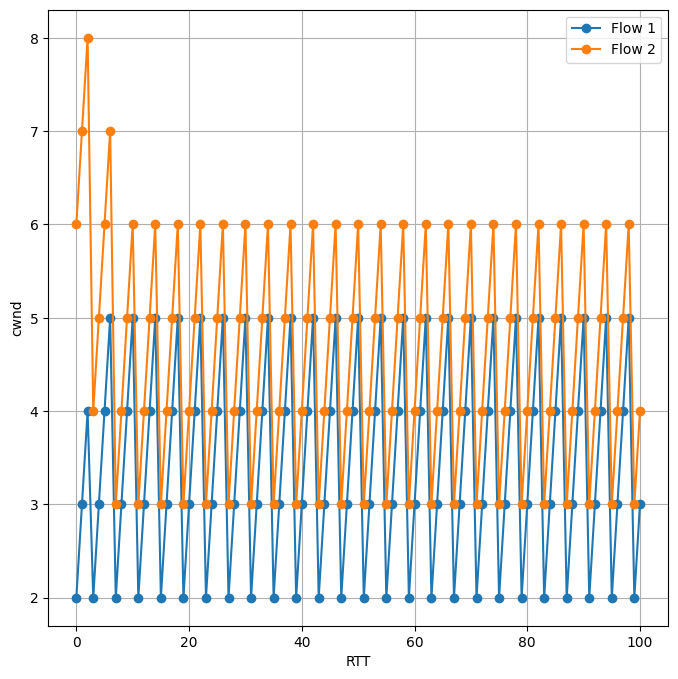

In [107]:
# Fixed beta at beta=0.5
# Constant Alpha Increase

seed(1)
e1 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e1.run_simulation(alpha=1, beta=0.5, alpha_setting='constant', max_iteration=100)

### Experiment 2: Log Alpha, Constant Beta

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [3, 7]
Interation 1: Additive Increase. New flow allocations: [4, 9]
Interation 2: Multiplicative Decrease. New flow allocations: [2, 4]
Interation 3: Additive Increase. New flow allocations: [3, 5]
Interation 4: Additive Increase. New flow allocations: [4, 6]
Interation 5: Additive Increase. New flow allocations: [5, 7]
Interation 6: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 7: Additive Increase. New flow allocations: [3, 4]
Interation 8: Additive Increase. New flow allocations: [4, 5]
Interation 9: Additive Increase. New flow allocations: [5, 6]
Interation 10: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 11: Additive Increase. New flow allocations: [3, 4]
Interation 12: Additive Increase. New flow allocations: [4, 5]
Interation 13: Additive Increase. New flow allocations: [5, 6]
Interation 14: Multiplicative Decrease. New flow allocations: [2, 3]
Interati

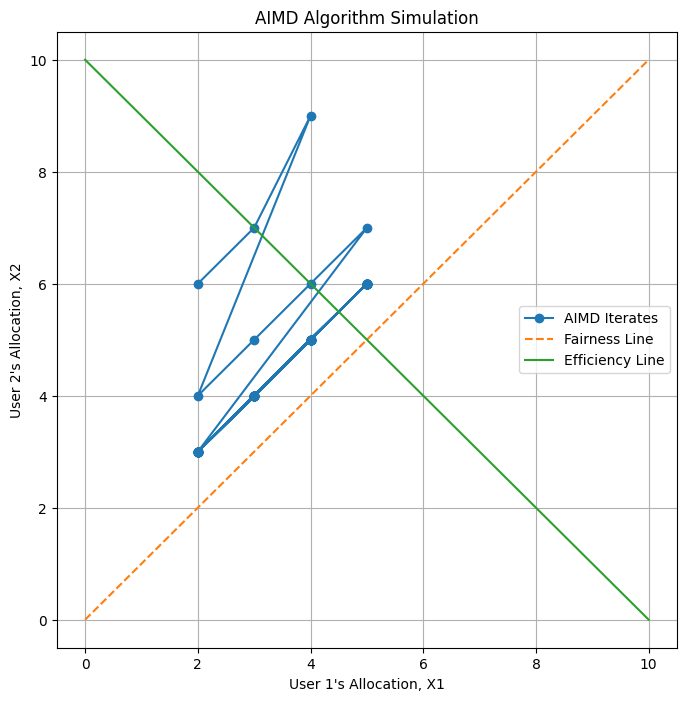

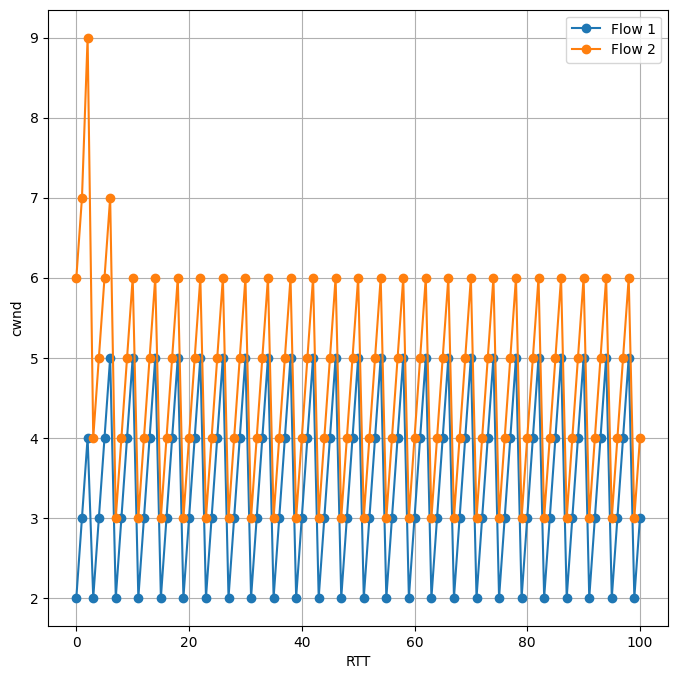

In [109]:
# Fixed beta at beta=0.5
# Logarithmic Function of Window Size

e2 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e2.run_simulation(alpha=1, beta=0.5, alpha_setting='log-incr', max_iteration=100)

### Experiment 3: Exp Alpha, Constant Beta

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [3, 7]
Interation 1: Additive Increase. New flow allocations: [4, 8]
Interation 2: Multiplicative Decrease. New flow allocations: [2, 4]
Interation 3: Additive Increase. New flow allocations: [3, 5]
Interation 4: Additive Increase. New flow allocations: [4, 6]
Interation 5: Additive Increase. New flow allocations: [5, 7]
Interation 6: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 7: Additive Increase. New flow allocations: [3, 4]
Interation 8: Additive Increase. New flow allocations: [4, 5]
Interation 9: Additive Increase. New flow allocations: [5, 6]
Interation 10: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 11: Additive Increase. New flow allocations: [3, 4]
Interation 12: Additive Increase. New flow allocations: [4, 5]
Interation 13: Additive Increase. New flow allocations: [5, 6]
Interation 14: Multiplicative Decrease. New flow allocations: [2, 3]
Interati

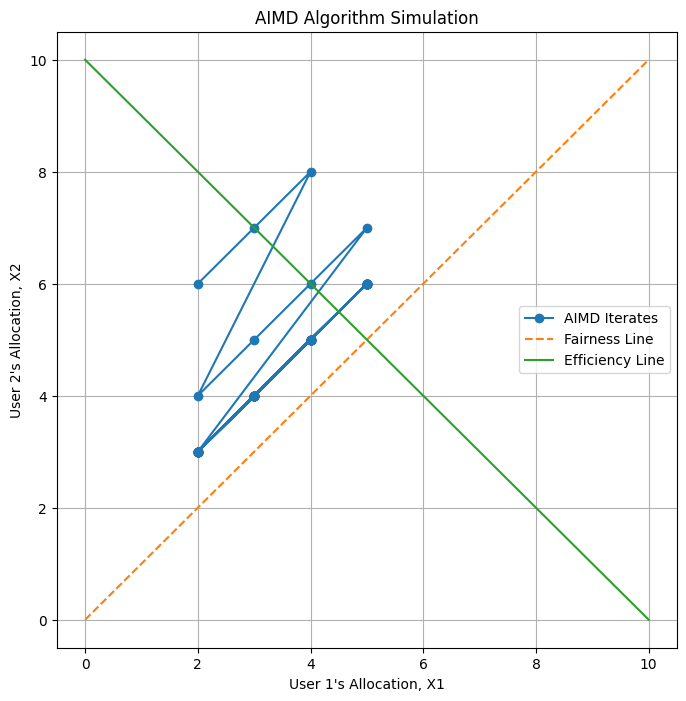

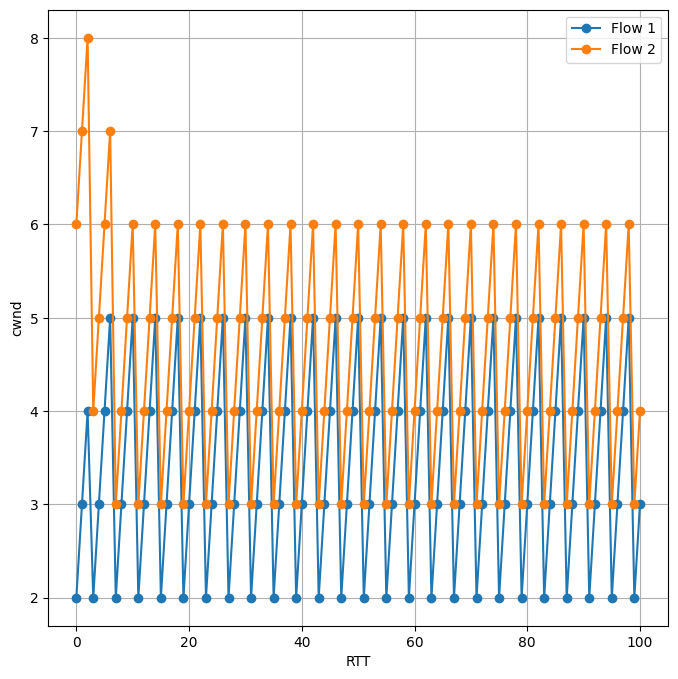

In [131]:
# Fixed beta at beta=0.5
# Exponential Function of Window Size

e3 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e3.run_simulation(alpha=1, beta=0.5, alpha_setting='exponent-incr', max_iteration=100)

### Experiment 4: Sigmoid Alpha, Constant Beta

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [4, 7]
Interation 1: Multiplicative Decrease. New flow allocations: [2, 3]
Interation 2: Additive Increase. New flow allocations: [4, 5]
Interation 3: Additive Increase. New flow allocations: [6, 7]
Interation 4: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 5: Additive Increase. New flow allocations: [5, 5]
Interation 6: Additive Increase. New flow allocations: [7, 7]
Interation 7: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 8: Additive Increase. New flow allocations: [5, 5]
Interation 9: Additive Increase. New flow allocations: [7, 7]
Interation 10: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 11: Additive Increase. New flow allocations: [5, 5]
Interation 12: Additive Increase. New flow allocations: [7, 7]
Interation 13: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 14: Additive Increase. New flow allocations: [5, 5]
In

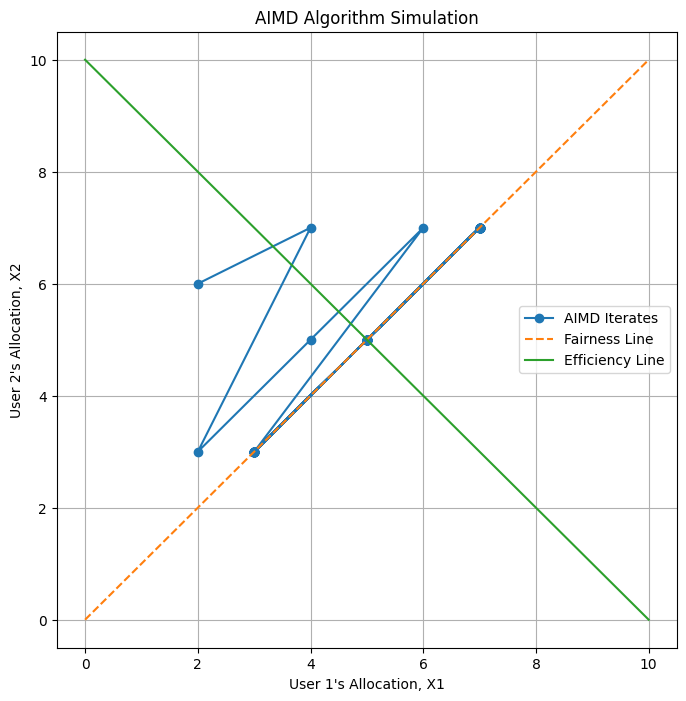

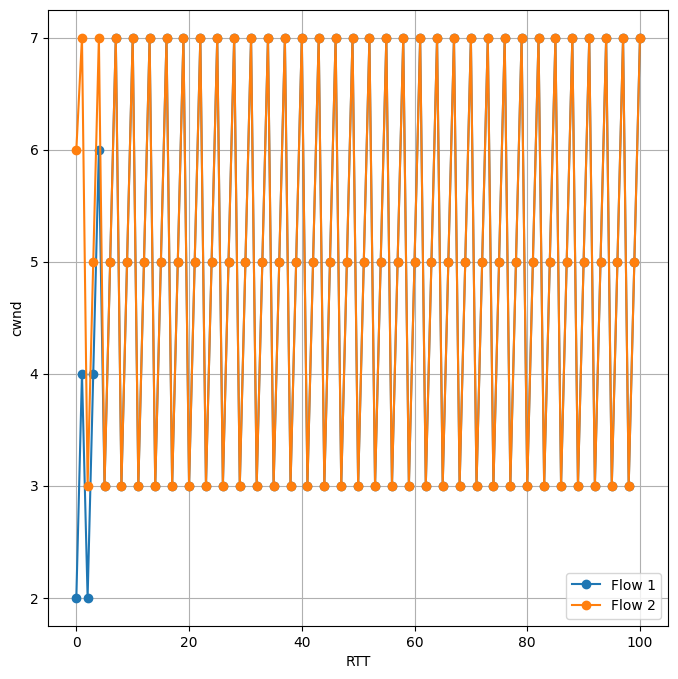

In [132]:
# Fixed beta at beta=0.5
# Sigmoid Function of Window Size

e4 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e4.run_simulation(alpha=1, beta=0.5, alpha_setting='sigmoid-incr', max_iteration=100)

### Experiment 5: Sigmoid Alpha, Constant Beta - Alternative Initial cwnd values

Initial flow allocations: [4, 5]
Interation 0: Additive Increase. New flow allocations: [6, 7]
Interation 1: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 2: Additive Increase. New flow allocations: [5, 5]
Interation 3: Additive Increase. New flow allocations: [7, 7]
Interation 4: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 5: Additive Increase. New flow allocations: [5, 5]
Interation 6: Additive Increase. New flow allocations: [7, 7]
Interation 7: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 8: Additive Increase. New flow allocations: [5, 5]
Interation 9: Additive Increase. New flow allocations: [7, 7]
Interation 10: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 11: Additive Increase. New flow allocations: [5, 5]
Interation 12: Additive Increase. New flow allocations: [7, 7]
Interation 13: Multiplicative Decrease. New flow allocations: [3, 3]
Interation 14: Additive Increase. New flow allocations: [5, 5]
In

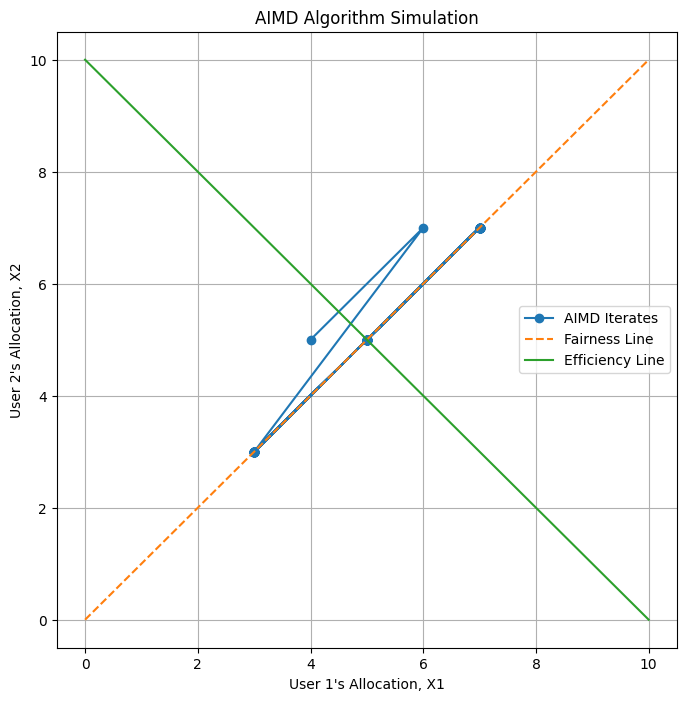

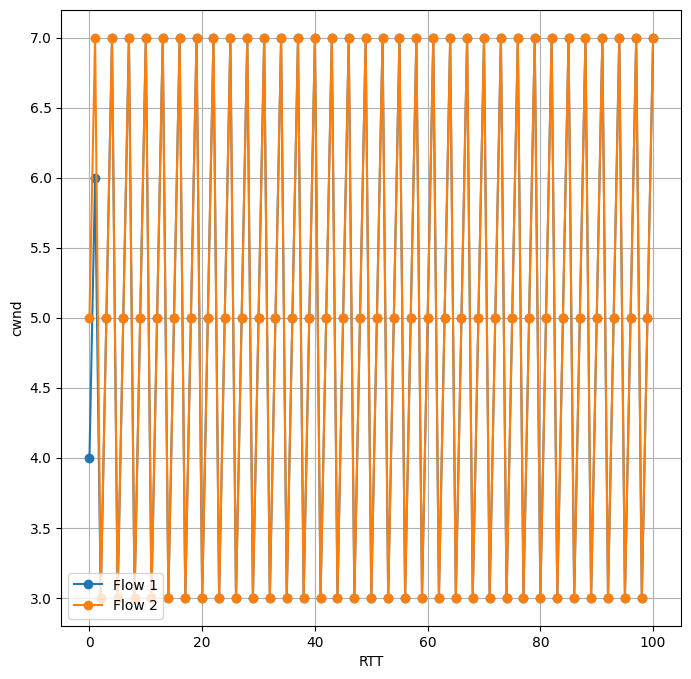

In [133]:
# Fixed beta at beta=0.5
# Sigmoid Function of Window Size

e5 = TuningAIMD(num_users=2, initial_cwnd=(4,5))
e5.run_simulation(alpha=1, beta=0.5, alpha_setting='sigmoid-incr', max_iteration=100)

### Experiment 6: Constant Alpha, Window-size Beta

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [3, 7]
Interation 1: Additive Increase. New flow allocations: [4, 8]
Interation 2: Multiplicative Decrease. New flow allocations: [0, 0]
Interation 3: Additive Increase. New flow allocations: [1, 1]
Interation 4: Additive Increase. New flow allocations: [2, 2]
Interation 5: Additive Increase. New flow allocations: [3, 3]
Interation 6: Additive Increase. New flow allocations: [4, 4]
Interation 7: Additive Increase. New flow allocations: [5, 5]
Interation 8: Additive Increase. New flow allocations: [6, 6]
Interation 9: Multiplicative Decrease. New flow allocations: [0, 0]
Interation 10: Additive Increase. New flow allocations: [1, 1]
Interation 11: Additive Increase. New flow allocations: [2, 2]
Interation 12: Additive Increase. New flow allocations: [3, 3]
Interation 13: Additive Increase. New flow allocations: [4, 4]
Interation 14: Additive Increase. New flow allocations: [5, 5]
Interation 15: Addit

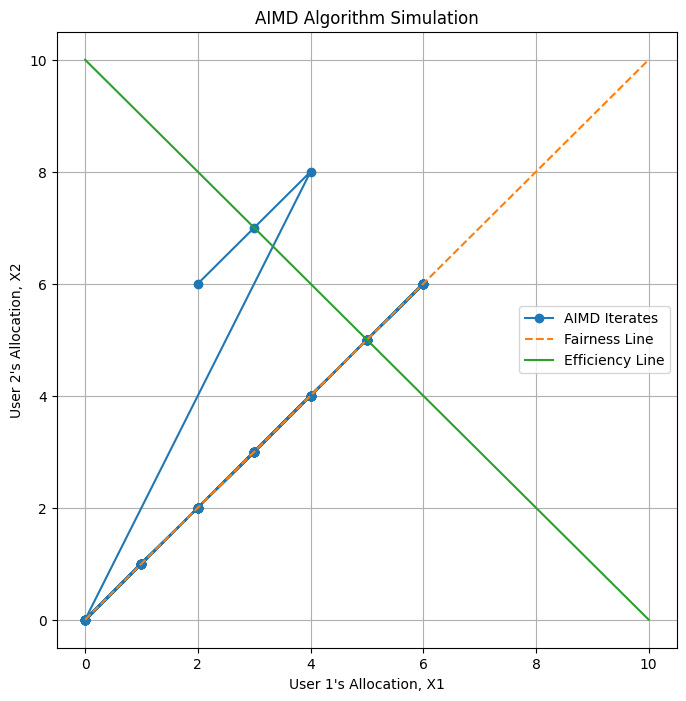

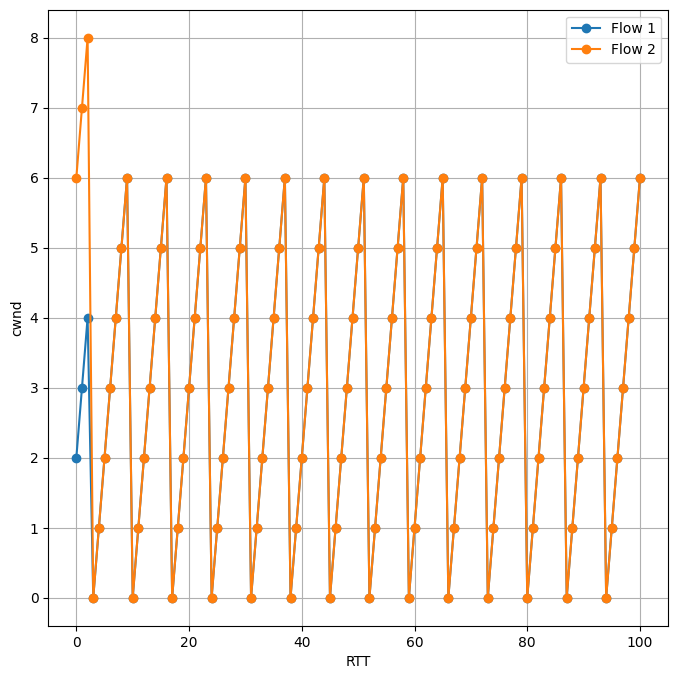

In [134]:
# Fixed alpha at alpha = 1
# Window size Dependent Decrease

e6 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e6.run_simulation(alpha=1, beta=0.5, beta_setting='cwnd-decr', max_iteration=100)

### Experiment 7: Constant Alpha, Inverse-Sigmoid Beta

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [3, 7]
Interation 1: Additive Increase. New flow allocations: [4, 8]
Interation 2: Multiplicative Decrease. New flow allocations: [1, 2]
Interation 3: Additive Increase. New flow allocations: [2, 3]
Interation 4: Additive Increase. New flow allocations: [3, 4]
Interation 5: Additive Increase. New flow allocations: [4, 5]
Interation 6: Additive Increase. New flow allocations: [5, 6]
Interation 7: Multiplicative Decrease. New flow allocations: [1, 2]
Interation 8: Additive Increase. New flow allocations: [2, 3]
Interation 9: Additive Increase. New flow allocations: [3, 4]
Interation 10: Additive Increase. New flow allocations: [4, 5]
Interation 11: Additive Increase. New flow allocations: [5, 6]
Interation 12: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 13: Additive Increase. New flow allocations: [3, 3]
Interation 14: Additive Increase. New flow allocations: [4, 4]
Interation 15:

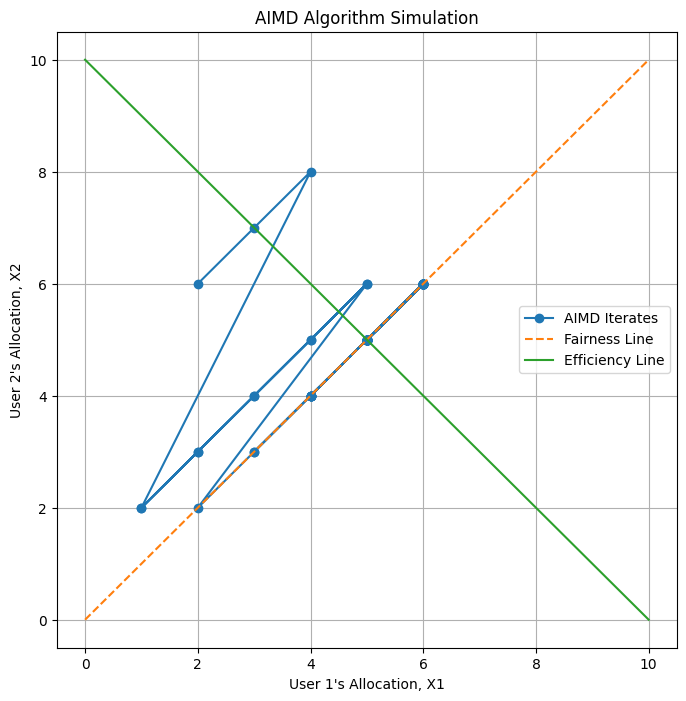

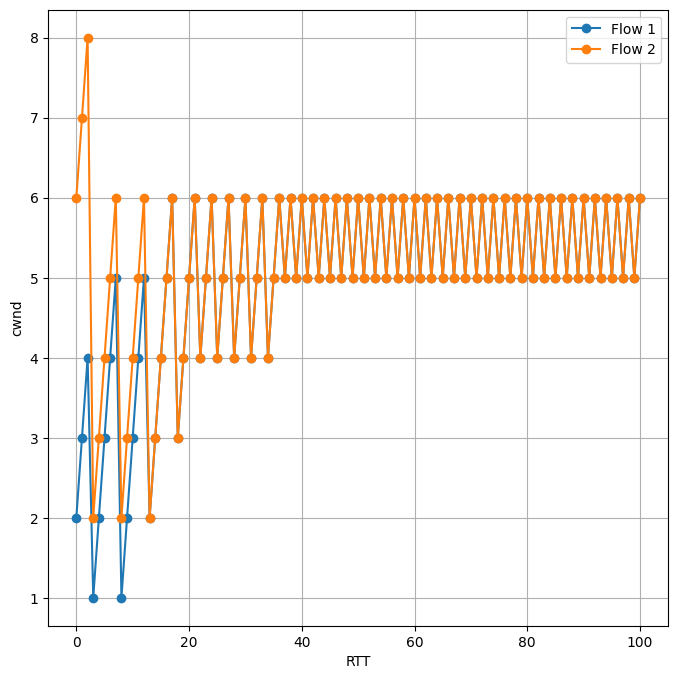

In [135]:
# Fixed alpha at alpha = 1
# Inverse Sigmoidal Decrease

e7 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e7.run_simulation(alpha=1, beta=0.5, beta_setting='inv-sigmoid-decr', max_iteration=100)

### Experiment 8: Sigmoid Alpha (scale=0.05, shift=5), Inverse-Sigmoid Beta (slope = 0.1, midpt=10)

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [4, 7]
Interation 1: Multiplicative Decrease. New flow allocations: [1, 1]
Interation 2: Additive Increase. New flow allocations: [3, 3]
Interation 3: Additive Increase. New flow allocations: [5, 5]
Interation 4: Additive Increase. New flow allocations: [7, 7]
Interation 5: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 6: Additive Increase. New flow allocations: [4, 4]
Interation 7: Additive Increase. New flow allocations: [6, 6]
Interation 8: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 9: Additive Increase. New flow allocations: [4, 4]
Interation 10: Additive Increase. New flow allocations: [6, 6]
Interation 11: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 12: Additive Increase. New flow allocations: [4, 4]
Interation 13: Additive Increase. New flow allocations: [6, 6]
Interation 14: Multiplicative Decrease. New flow allocations: [3, 3]
In

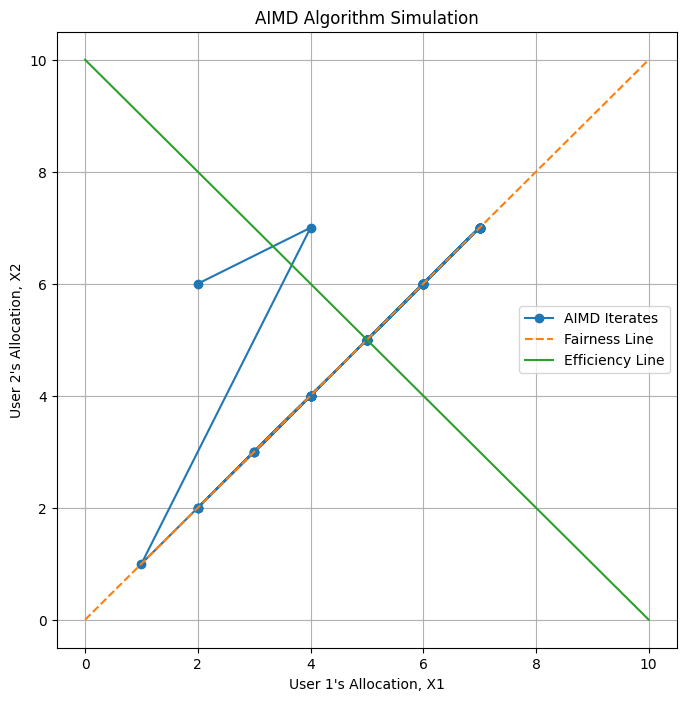

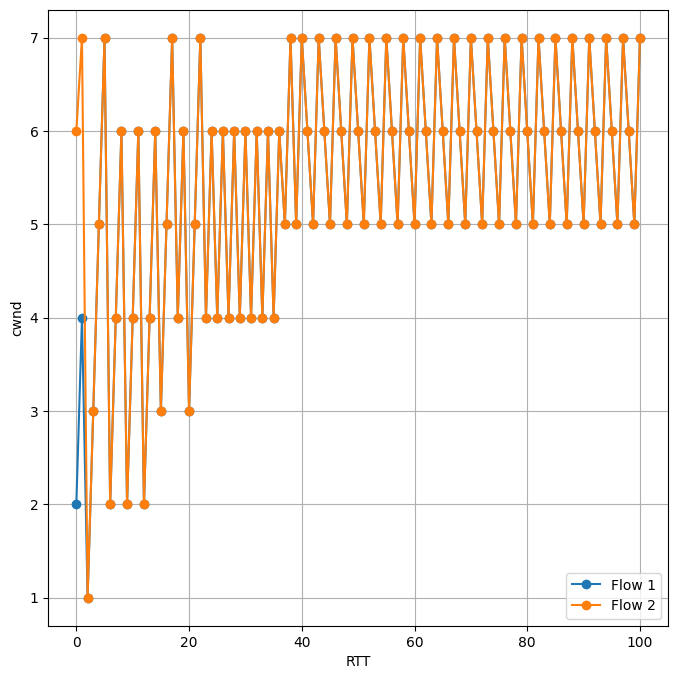

In [151]:
# AI - sigmoid
# MD - window-size

e8 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e8.run_simulation(alpha=1, beta=0.5, alpha_setting='sigmoid-incr', beta_setting='inv-sigmoid-decr', max_iteration=100)

### Experiment 9: Sigmoid Alpha (scale=0.01, shift=3), Inverse-Sigmoid Beta (slope = 0.1, midpt=10)

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [6, 9]
Interation 1: Multiplicative Decrease. New flow allocations: [1, 2]
Interation 2: Additive Increase. New flow allocations: [5, 6]
Interation 3: Multiplicative Decrease. New flow allocations: [1, 1]
Interation 4: Additive Increase. New flow allocations: [5, 5]
Interation 5: Additive Increase. New flow allocations: [8, 8]
Interation 6: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 7: Additive Increase. New flow allocations: [6, 6]
Interation 8: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 9: Additive Increase. New flow allocations: [6, 6]
Interation 10: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 11: Additive Increase. New flow allocations: [6, 6]
Interation 12: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 13: Additive Increase. New flow allocations: [6, 6]
Interation 14: Multiplicative Decrease. New flow allocation

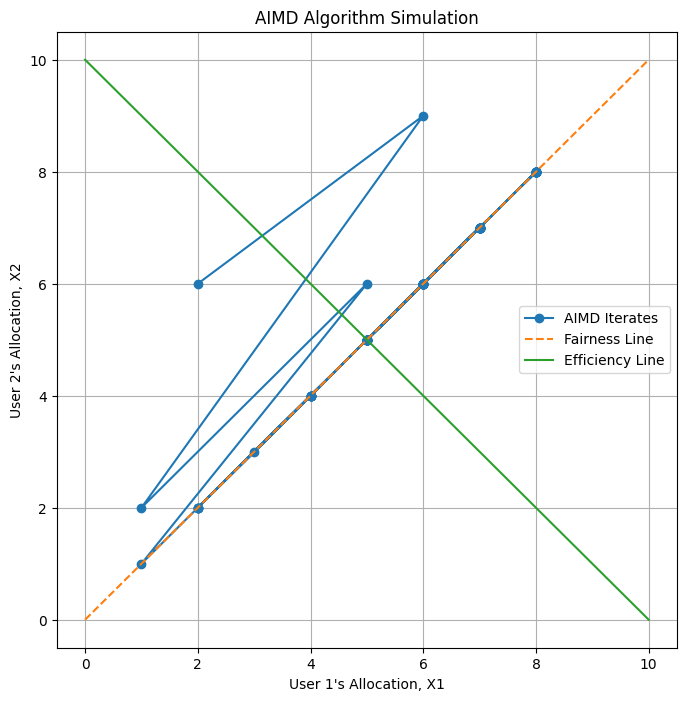

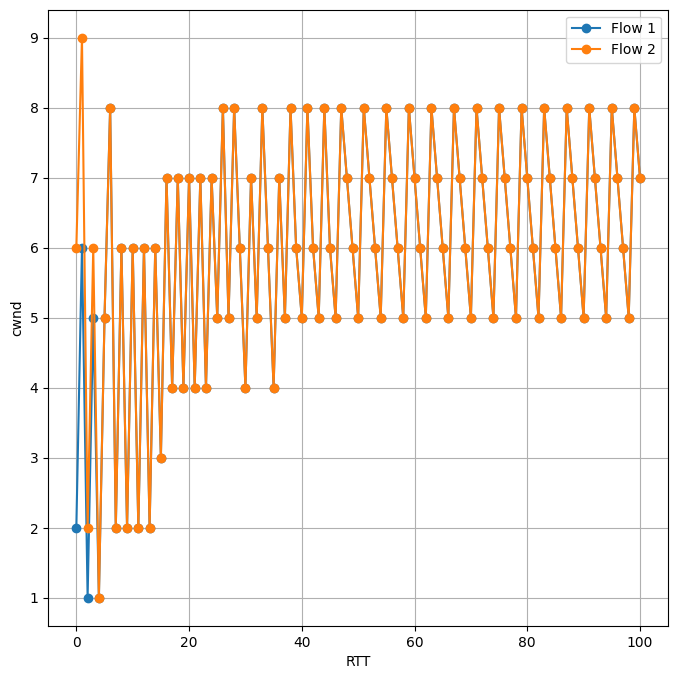

In [152]:
# AI - sigmoid
# MD - window-size

e9 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e9.run_simulation(alpha=2, beta=0.7, alpha_setting='sigmoid-incr', alpha_sigmoid_scale=0.01, alpha_sigmoid_shift= 3, beta_setting='inv-sigmoid-decr', max_iteration=100)

### Experiment 10: Sigmoid Alpha (scale=0.05, shift=5), Inverse-Sigmoid Beta (slope = 0.4, midpt=15)

Initial flow allocations: [2, 6]
Interation 0: Additive Increase. New flow allocations: [6, 9]
Interation 1: Multiplicative Decrease. New flow allocations: [1, 2]
Interation 2: Additive Increase. New flow allocations: [5, 6]
Interation 3: Multiplicative Decrease. New flow allocations: [1, 1]
Interation 4: Additive Increase. New flow allocations: [5, 5]
Interation 5: Additive Increase. New flow allocations: [9, 9]
Interation 6: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 7: Additive Increase. New flow allocations: [6, 6]
Interation 8: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 9: Additive Increase. New flow allocations: [6, 6]
Interation 10: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 11: Additive Increase. New flow allocations: [6, 6]
Interation 12: Multiplicative Decrease. New flow allocations: [2, 2]
Interation 13: Additive Increase. New flow allocations: [6, 6]
Interation 14: Multiplicative Decrease. New flow allocation

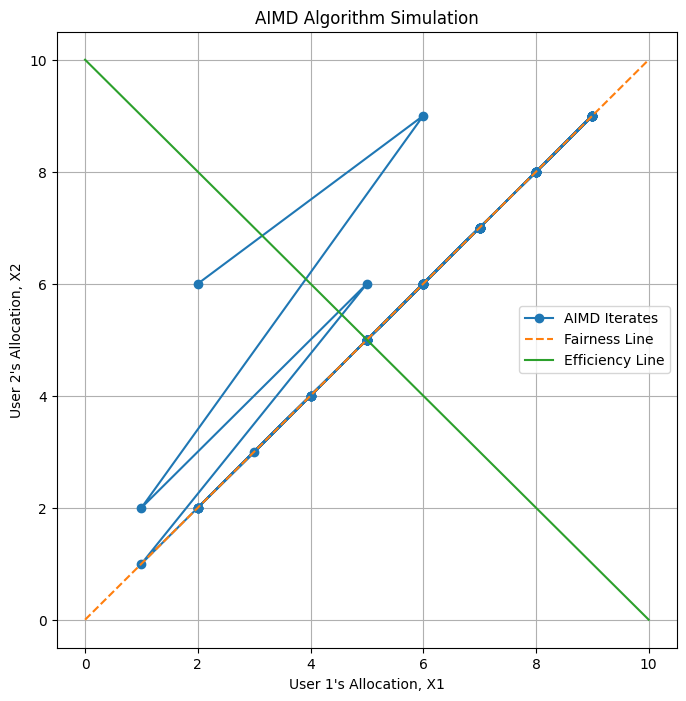

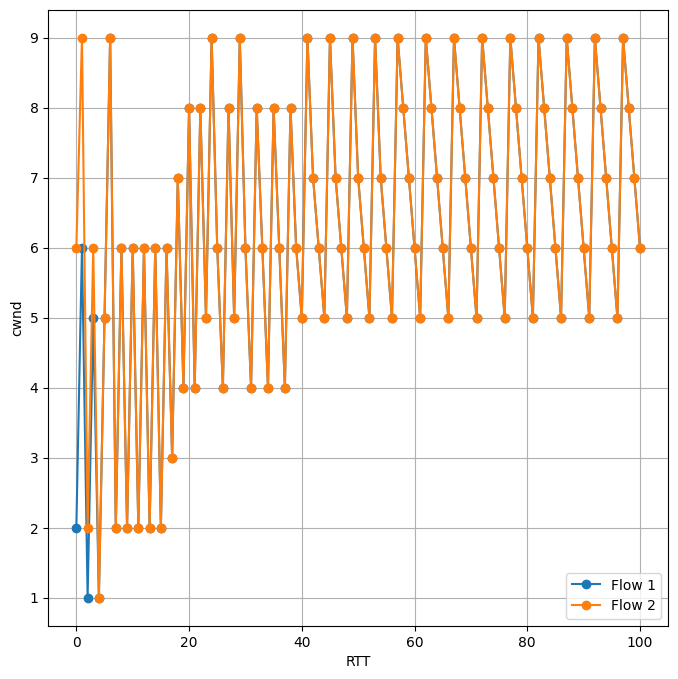

In [161]:
# AI - sigmoid
# MD - window-size

e10 = TuningAIMD(num_users=2, initial_cwnd=(2,6))
e10.run_simulation(alpha=2, beta=0.7, alpha_setting='sigmoid-incr', beta_setting='inv-sigmoid-decr', beta_inv_sigmoid_slope=0.1, beta_inv_sigmoid_midpt=15, max_iteration=100)

## When number of TCP Users/ Flows = 5

### Experiment 11: Sigmoid Alpha (scale=0.05, shift=5), Inverse-Sigmoid Beta (slope = 0.1, midpt=15)

Initial flow allocations: [18, 73, 98, 9, 33]
Interation 0: Multiplicative Decrease. New flow allocations: [2, 11, 16, 1, 5]
Interation 1: Additive Increase. New flow allocations: [6, 14, 19, 5, 9]
Interation 2: Additive Increase. New flow allocations: [9, 17, 21, 9, 12]
Interation 3: Additive Increase. New flow allocations: [12, 20, 23, 12, 15]
Interation 4: Additive Increase. New flow allocations: [15, 22, 25, 15, 18]
Interation 5: Additive Increase. New flow allocations: [18, 24, 27, 18, 21]
Interation 6: Multiplicative Decrease. New flow allocations: [4, 6, 7, 4, 5]
Interation 7: Additive Increase. New flow allocations: [8, 9, 10, 8, 9]
Interation 8: Additive Increase. New flow allocations: [11, 12, 13, 11, 12]
Interation 9: Additive Increase. New flow allocations: [14, 15, 16, 14, 15]
Interation 10: Additive Increase. New flow allocations: [17, 18, 19, 17, 18]
Interation 11: Additive Increase. New flow allocations: [20, 21, 21, 20, 21]
Interation 12: Multiplicative Decrease. New f

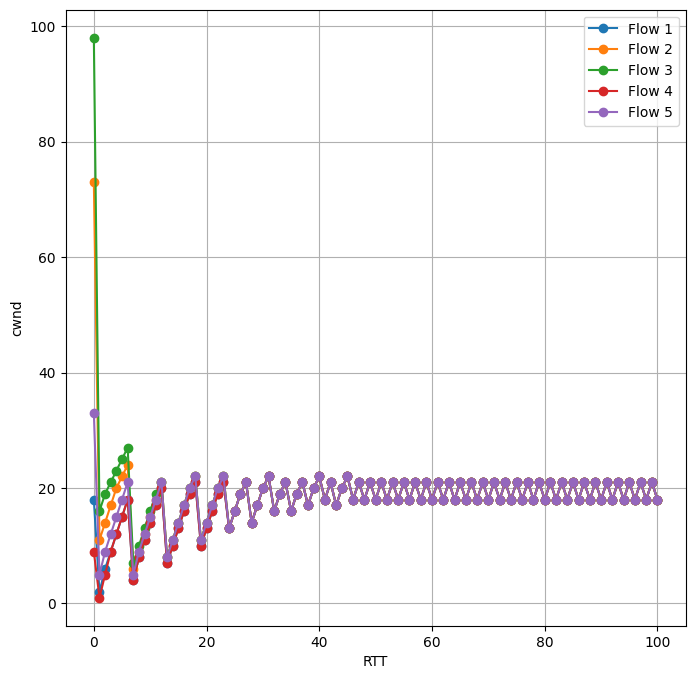

In [171]:
# AI - sigmoid
# MD - window-size
# 5 users

seed(1)
e11 = TuningAIMD(num_users=5, capacity=100)
e11.run_simulation(alpha=2, beta=0.7, alpha_setting='sigmoid-incr', beta_setting='inv-sigmoid-decr', beta_inv_sigmoid_midpt=15, max_iteration=100)

### Experiment 12: Constant Alpha, Constant Beta

Initial flow allocations: [18, 73, 98, 9, 33]
Interation 0: Multiplicative Decrease. New flow allocations: [12, 51, 68, 6, 23]
Interation 1: Multiplicative Decrease. New flow allocations: [8, 35, 47, 4, 16]
Interation 2: Multiplicative Decrease. New flow allocations: [5, 24, 32, 2, 11]
Interation 3: Additive Increase. New flow allocations: [7, 26, 34, 4, 13]
Interation 4: Additive Increase. New flow allocations: [9, 28, 36, 6, 15]
Interation 5: Additive Increase. New flow allocations: [11, 30, 38, 8, 17]
Interation 6: Multiplicative Decrease. New flow allocations: [7, 21, 26, 5, 11]
Interation 7: Additive Increase. New flow allocations: [9, 23, 28, 7, 13]
Interation 8: Additive Increase. New flow allocations: [11, 25, 30, 9, 15]
Interation 9: Additive Increase. New flow allocations: [13, 27, 32, 11, 17]
Interation 10: Additive Increase. New flow allocations: [15, 29, 34, 13, 19]
Interation 11: Multiplicative Decrease. New flow allocations: [10, 20, 23, 9, 13]
Interation 12: Additive In

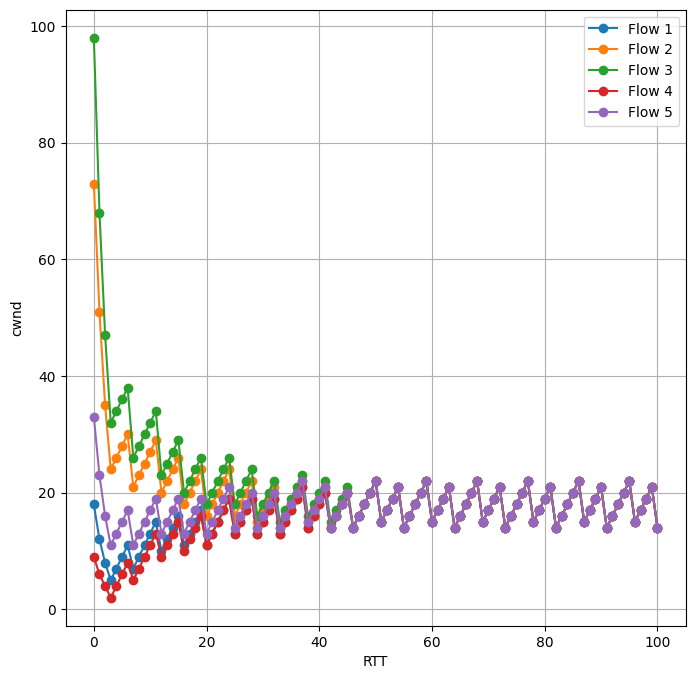

In [179]:
# AI - constant
# MD - constant
# 5 users

seed(1)
e12 = TuningAIMD(num_users=5, capacity=100)
e12.run_simulation(alpha=2, beta=0.7, alpha_setting='constant', beta_setting='constant', max_iteration=100)

## When number of TCP Users/ Flows = 10

### Experiment 13: Sigmoid Alpha (scale=0.05, shift=5), Inverse-Sigmoid Beta (slope = 0.1, midpt=15)

Initial flow allocations: [18, 73, 98, 9, 33, 16, 64, 98, 58, 61]
Interation 0: Multiplicative Decrease. New flow allocations: [2, 11, 16, 1, 5, 2, 10, 16, 9, 10]
Interation 1: Additive Increase. New flow allocations: [6, 14, 19, 5, 9, 6, 13, 19, 12, 13]
Interation 2: Multiplicative Decrease. New flow allocations: [1, 2, 3, 0, 1, 1, 2, 3, 2, 2]
Interation 3: Additive Increase. New flow allocations: [5, 6, 7, 4, 5, 5, 6, 7, 6, 6]
Interation 4: Additive Increase. New flow allocations: [9, 9, 10, 8, 9, 9, 9, 10, 9, 9]
Interation 5: Additive Increase. New flow allocations: [12, 12, 13, 11, 12, 12, 12, 13, 12, 12]
Interation 6: Multiplicative Decrease. New flow allocations: [3, 3, 3, 2, 3, 3, 3, 3, 3, 3]
Interation 7: Additive Increase. New flow allocations: [7, 7, 7, 6, 7, 7, 7, 7, 7, 7]
Interation 8: Additive Increase. New flow allocations: [10, 10, 10, 9, 10, 10, 10, 10, 10, 10]
Interation 9: Additive Increase. New flow allocations: [13, 13, 13, 12, 13, 13, 13, 13, 13, 13]
Interation 10:

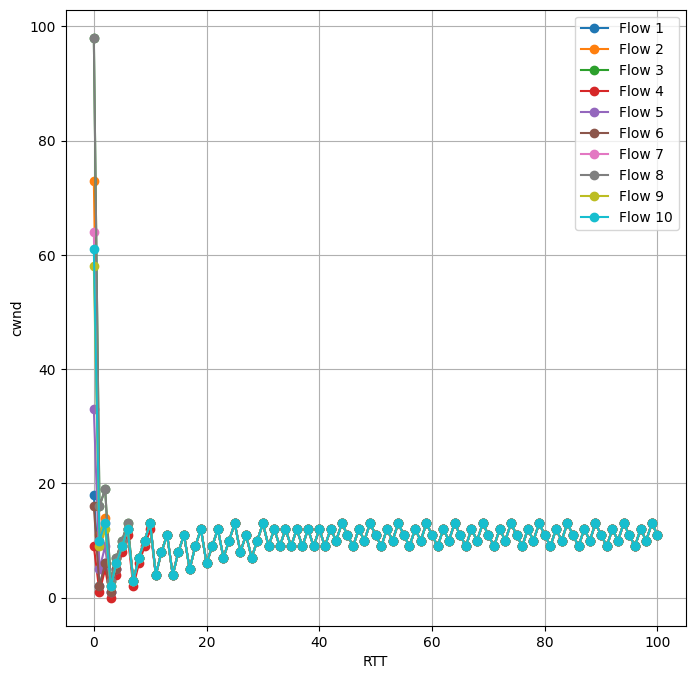

In [178]:
# AI - sigmoid 
# MD - window-size
# 10 users

seed(1)
e13 = TuningAIMD(num_users=10, capacity=100)
e13.run_simulation(alpha=2, beta=0.7, alpha_setting='sigmoid-incr', beta_setting='inv-sigmoid-decr', beta_inv_sigmoid_midpt=15, max_iteration=100)